<a href="https://colab.research.google.com/github/Atheer59/IT351/blob/main/URL_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods. 

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:



Dataset was borrowed from kaggle

https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset

In [ ]:
#Loading data into dataframe

data = pd.read_csv("malicious_phish.csv")
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Shape of dataframe

data.shape

(651191, 2)

In [ ]:
#Listing the features of the dataset

data.columns

Index(['url', 'type'], dtype='object')

In [ ]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
# nunique value in columns

data.nunique()

url     641119
type         4
dtype: int64

In [ ]:
#description of dataset

data.describe().T

,count,unique,top,freq
url,651191,641119,http://style.org.hc360.com/css/detail/mysite/s...,180
type,651191,4,benign,428103


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

In [ ]:
sns.boxplot(x="type",y="url",data=data)


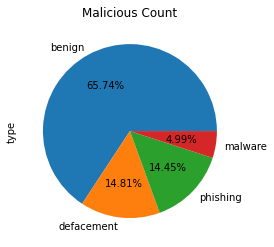

In [ ]:
# URL Count in pie chart

data['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Malicious Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [ ]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["type"],axis =1)
y = data["type"]

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((520952, 1), (520952,), (130239, 1), (130239,))

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [ ]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
education_encoded = encoder.fit_transform(X_train)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(education_encoded,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(education_encoded)
encoded1 = encoder.fit_transform(X_test)
y_test_knn = knn.predict(encoded1)

In [ ]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn,average='micro')
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn,average='micro')
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn,average='micro')
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn,average='micro')
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn,average='micro')
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn,average='micro')
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 1.000
K-Nearest Neighbors : Accuracy on test Data: 0.620

K-Nearest Neighbors : f1_score on training Data: 1.000
K-Nearest Neighbors : f1_score on test Data: 0.620

K-Nearest Neighborsn : Recall on training Data: 1.000
Logistic Regression : Recall on test Data: 0.620

K-Nearest Neighbors : precision on training Data: 1.000
K-Nearest Neighbors : precision on test Data: 0.620


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

      benign       0.66      0.93      0.77     85778
  defacement       0.00      0.00      0.00     19104
     malware       0.07      0.00      0.01      6521
    phishing       0.13      0.07      0.09     18836

    accuracy                           0.62    130239
   macro avg       0.22      0.25      0.22    130239
weighted avg       0.46      0.62      0.52    130239



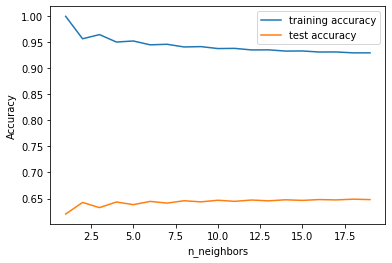

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(education_encoded, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(education_encoded, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(encoded1, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();